In [1]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
import datetime
dp = '/home/ebert/jupyter-notebooks/FNode-data'

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/local/lib/python2.7/dist-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
/usr/local/lib/python2.7/dist-

In [2]:
exp_name = ''
if exp_name:
    exp_date = '_'.join(exp_name.split('_')[:3])
    experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
else:
    experiment_file = ''
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)

data at: 2019_07_29/2019_07_29_16_06_06_retentioniyread/results.hdf5
name 'fort_exp' is not defined
name 'rb_uwave_freq' is not defined


In [3]:
q.experiments[0]['variable_list']

[u'Iz']

In [4]:
sig_data = q.experiments[0]['iterations'][0]['signal_data']
print sig_data.shape
shots, rois = sig_data.shape[1:3]
max_sig = np.max(sig_data.astype('int32').flatten())
binned_data = np.zeros((shots, rois, max_sig+1))
bins = range(max_sig+2)
for r in range(rois):
    for s in range(shots):
        binned_data[s,r] = np.histogram(sig_data[:, s, r], bins=bins, normed=True)[0]
    
means = np.mean(sig_data, axis=0)

(21, 2, 3, 1)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


In [5]:
np.mean(sig_data[:,s,r])

174.9047619047619

In [6]:
s=1
r=0
fig, ax = plt.subplots()
ax.hist(sig_data[:,s,r], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
# ax.plot(xs, poisson.pmf(xs, np.mean(sig_data[:,s,r])))
ax.plot(xs, 1-poisson.cdf(xs-1, np.mean(sig_data[:,s,r])))
ax.set_ylim(0, 0.1)
fidelity = 0.995
c = int(np.mean(sig_data[:,s,r]))
while True:
    c += 1
    if poisson.cdf(c-1, np.mean(sig_data[:,s,r])) > fidelity:
        print "fidelity = {} for threshold = {}".format(poisson.cdf(c-1, np.mean(sig_data[:,s,r])), c)
        break
np.mean(sig_data[:,s,r])
ax.set_xlim(0,c+3)

<IPython.core.display.Javascript object>

fidelity = 0.997419862519 for threshold = 21


(0, 24)

<IPython.core.display.Javascript object>


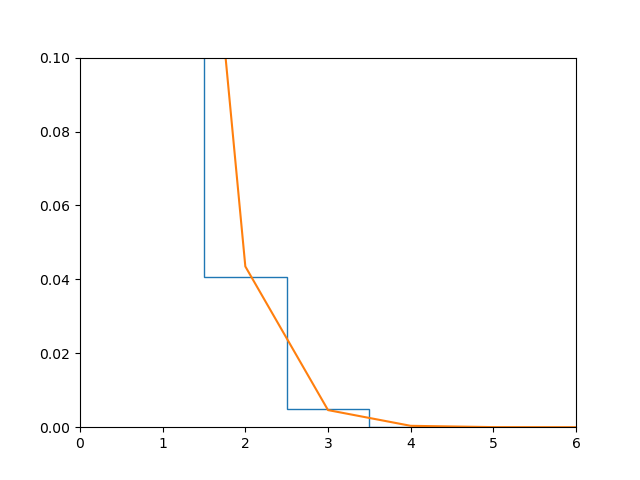

fidelity = 0.995369849278 for threshold = 3


(0, 6)

In [95]:
s=1
r=1
fig, ax = plt.subplots()
ax.hist(sig_data[:,s,r], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
# ax.plot(xs, poisson.pmf(xs, np.mean(sig_data[:,s,r])))
ax.plot(xs, 1-poisson.cdf(xs-1, np.mean(sig_data[:,s,r])))
ax.set_ylim(0, 0.1)
fidelity = 0.995
c = int(np.mean(sig_data[:,s,r]))
while True:
    c += 1
    if poisson.cdf(c-1, np.mean(sig_data[:,s,r])) > fidelity:
        print "fidelity = {} for threshold = {}".format(poisson.cdf(c-1, np.mean(sig_data[:,s,r])), c)
        break
np.mean(sig_data[:,s,r])
ax.set_xlim(0,c+3)

<IPython.core.display.Javascript object>


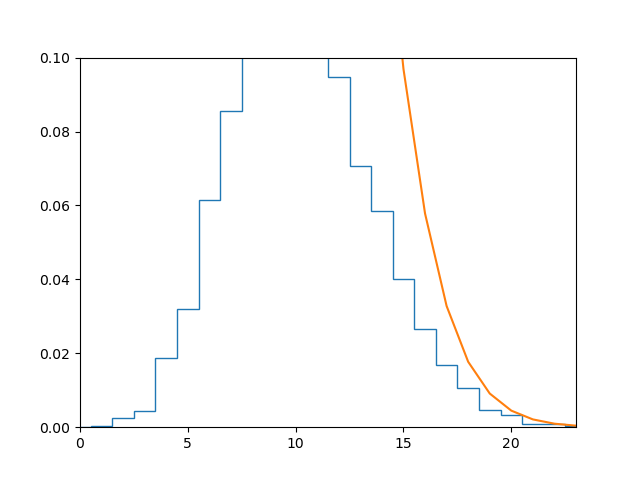

fidelity = 0.995519677058 for threshold = 20


(0, 23)

In [96]:
s=0
r=0
fig, ax = plt.subplots()
ax.hist(sig_data[:,s,r], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
# ax.plot(xs, poisson.pmf(xs, np.mean(sig_data[:,s,r])))
ax.plot(xs, 1-poisson.cdf(xs-1, np.mean(sig_data[:,s,r])))
ax.set_ylim(0, 0.1)
fidelity = 0.995
c = int(np.mean(sig_data[:,s,r]))
while True:
    c += 1
    if poisson.cdf(c-1, np.mean(sig_data[:,s,r])) > fidelity:
        print "fidelity = {} for threshold = {}".format(poisson.cdf(c-1, np.mean(sig_data[:,s,r])), c)
        break
np.mean(sig_data[:,s,r])
ax.set_xlim(0,c+3)

<IPython.core.display.Javascript object>


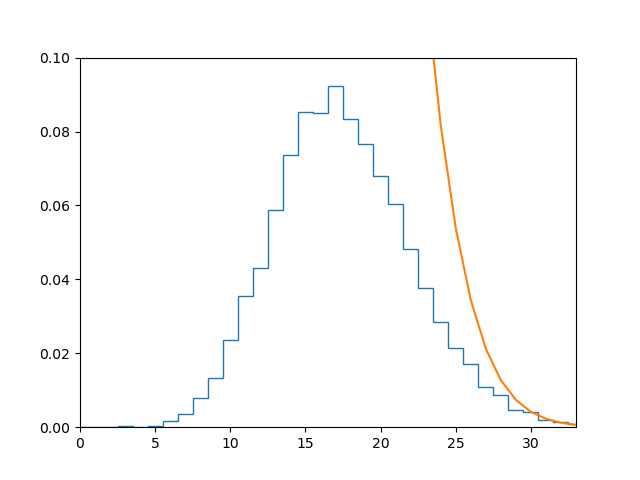

fidelity = 0.995845335469 for threshold = 30


(0, 33)

In [97]:
s=0
r=1
fig, ax = plt.subplots()
ax.hist(sig_data[:,s,r], bins=bins, normed=True, align='left', histtype='step')
xs = np.arange(max(bins))
# ax.plot(xs, poisson.pmf(xs, np.mean(sig_data[:,s,r])))
ax.plot(xs, 1-poisson.cdf(xs-1, np.mean(sig_data[:,s,r])))
ax.set_ylim(0, 0.1)
fidelity = 0.995
c = int(np.mean(sig_data[:,s,r]))
while True:
    c += 1
    if poisson.cdf(c-1, np.mean(sig_data[:,s,r])) > fidelity:
        print "fidelity = {} for threshold = {}".format(poisson.cdf(c-1, np.mean(sig_data[:,s,r])), c)
        break
np.mean(sig_data[:,s,r])
ax.set_xlim(0,c+3)